[1 1 1 0 0 0]
[[7.         4.33333333]
 [2.         1.33333333]]


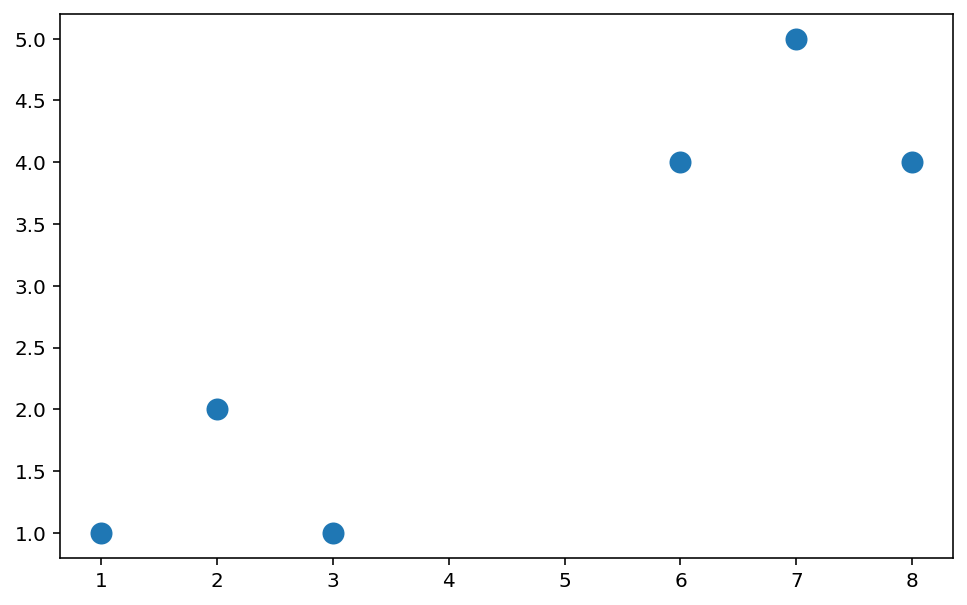

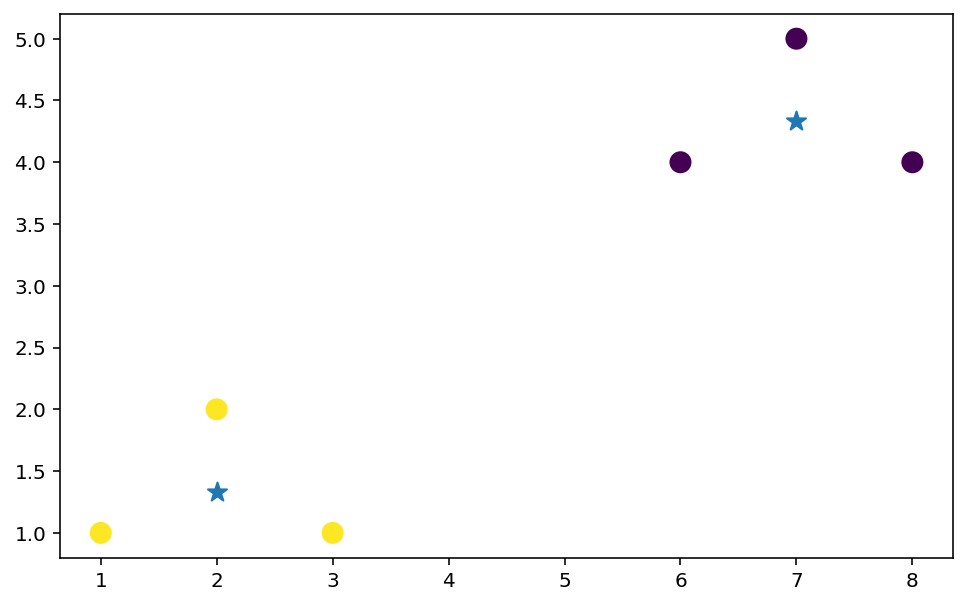

In [1]:
#聚类 示例1
#（1）导入库
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

#（2）生成样本数据
samples = np.array([[1,1],[2,2],[3,1],[6,4],[7,5],[8,4]])

#（3）把样本数据显示在二维坐标上
plt.figure(figsize=(8,5),dpi=144)  #利用figure创建画布，设置图像大小为8*5英寸，图形每英寸的点数为144.
plt.scatter(samples[:,0],samples[:,1],s=100)#利用scatter以samples的第0列和第1列数据作为两个维度绘制散点图

#（4）使用KMeans模型拟合
est=KMeans(n_clusters=2)
est.fit(samples)

#（5）将聚类结果利用散点图显示出来
labels=est.labels_
centers=est.cluster_centers_
print(labels)
print(centers)
fig=plt.figure(figsize=(8,5),dpi=144)
#plt.scatter(samples[:,0],samples[:,1],s=100,c=labels.astype(np.float))
plt.scatter(samples[:,0],samples[:,1],s=100,c=labels)
plt.scatter(centers[:,0],centers[:,1],s=100,marker="*")
plt.show()


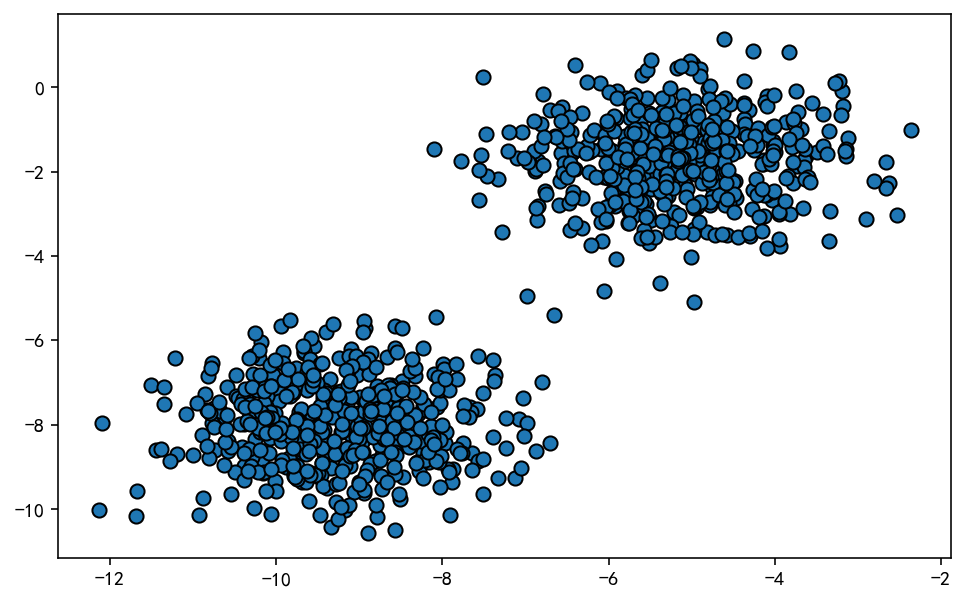

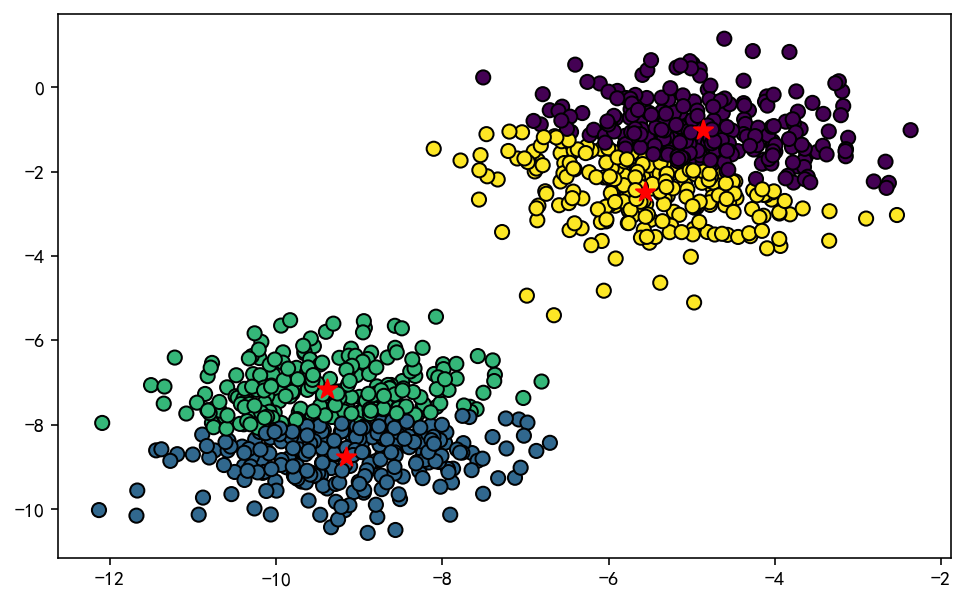

In [8]:
#聚类 示例2
#（1）导入库
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

#（2）利用scikit-learn中的make_blobs函数生成样本数据集
X,Y=make_blobs(n_samples=1000,centers=2)  #以上语句生成1000个样本，2个中心点的样本数据集，并将生成的样本返回给X变量，标签返回给Y变量
#print(X.shape)
#print(Y[0:20])
#（3）利用散点图的形式将样本数据展示出来
plt.figure(figsize=(8,5),dpi=144)
plt.scatter(X[:,0],X[:,1],s=50,edgecolor='k')  #以上语句生成1000个样本，2个中心点的样本数据集，并将生成的样本返回给X变量，标签返回给Y变量
plt.show()

#（4）使用KMeans模型拟合，聚类数设为4。
kmean=KMeans(4)
kmean.fit(X)

#（5）将聚类结果利用散点图显示出来
labels=kmean.labels_
centers=kmean.cluster_centers_
fig=plt.figure(figsize=(8,5),dpi=144)
#plt.scatter(X[:,0],X[:,1],c=labels.astype(int),s=50,edgecolor='k')#显示聚类结果
plt.scatter(X[:,0],X[:,1],c=labels,s=50,edgecolor='k')
plt.scatter(centers[:,0],centers[:,1],c='r',s=100,marker="*")#显示质心
plt.show()

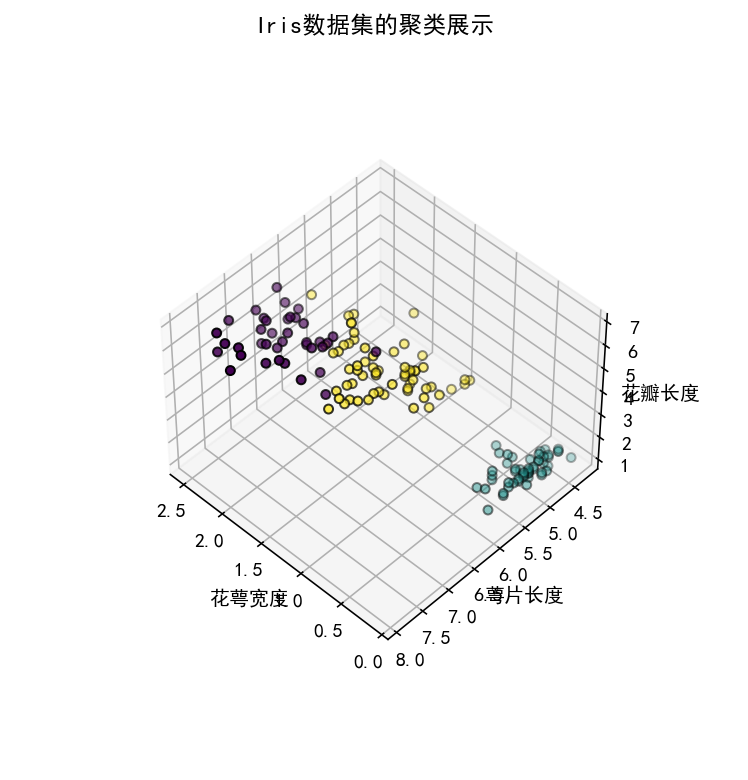

In [13]:
#聚类 示例3
#（1）导入库
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei'] #避免中文出现乱码

#（2）导入Iris数据
iris=datasets.load_iris()#导入iris数据
X=iris.data

#（3）使用KMeans模型拟合，聚类数设为3
est=KMeans(n_clusters=3)
est.fit(X)

#（4）选取其中的三个维度，并显示其聚类结果
labels=est.labels_
fig=plt.figure(figsize=(8,5),dpi=144)
ax=Axes3D(fig,elev=48,azim=134) #创建Axes3D对象ax,设置当前的图像为fig,设置仰角为48度,设置方位角为134度

#scatter函数以X数据集的第3列、第0列和第2列数据(即花萼宽度、萼片长度和花瓣长度)作为坐标绘制散点图
#根据聚类类别设置数据点的颜色，设置数据点边缘为黑色
#ax.scatter(X[:,3],X[:,0],X[:,2],c=labels.astype(np.float),edgecolor='k')
ax.scatter(X[:,3],X[:,0],X[:,2],c=labels,edgecolor='k')
#设置三个坐标轴的名称
ax.set_xlabel('花萼宽度')
ax.set_ylabel('萼片长度')
ax.set_zlabel('花瓣长度')
#设置整个散点图的名称为“Iris数据集的聚类展示”
ax.set_title('Iris数据集的聚类展示')
ax.dist=15  #设置了视角的观看距离，调整这个值，可以放大缩小图片
plt.show()

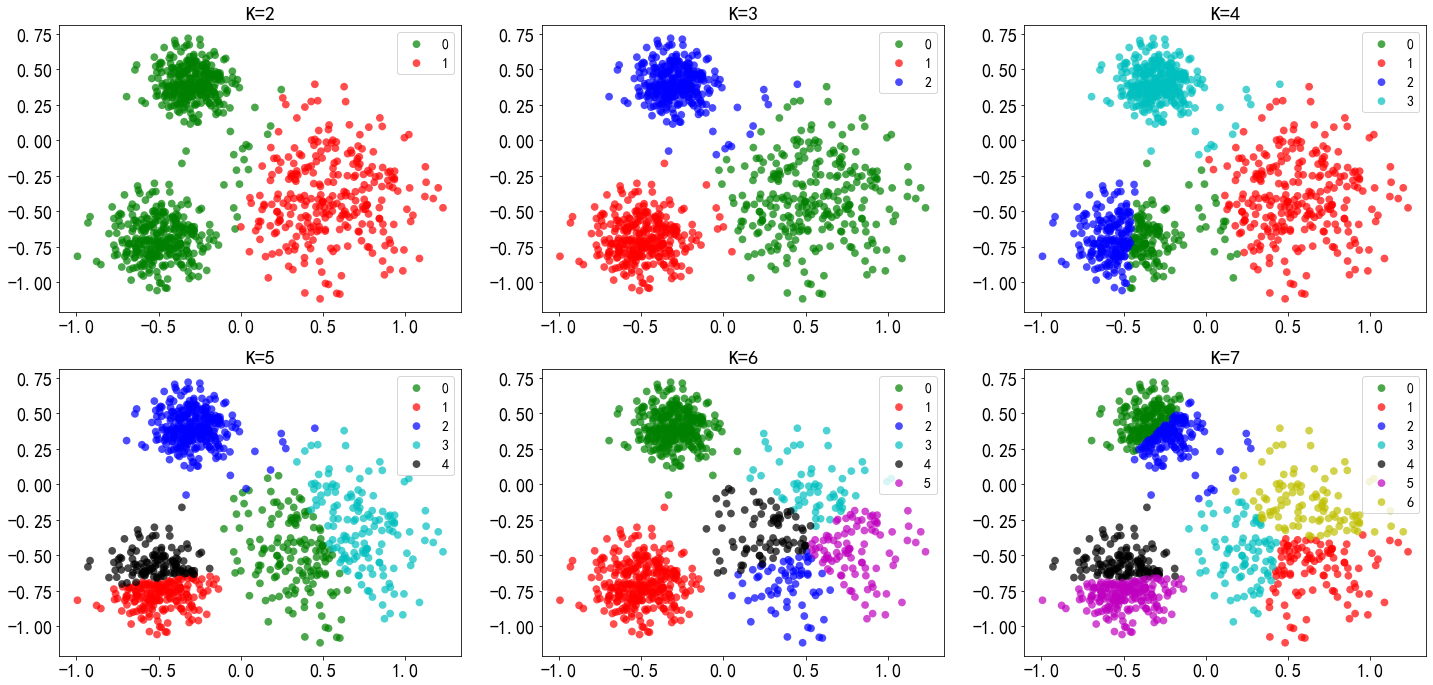

In [11]:
#示例4 手撕K-Means算法
import math
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
import numpy as np


# 产生样本
def generate_data(n_samples, idx):
    centers = [[-0.5, -0.7], [-0.3, 0.4], [0.5, -0.4]]
    stds = [0.15, 0.12, 0.3]
    return make_blobs(n_features=2, n_samples=n_samples,
                cluster_std=stds[idx], centers=[centers[idx]],
  random_state=5)[0]


# 计算欧式距离
def cal_Euclidean(p1, p2):
    return math.sqrt(sum([(p1[i] - p2[i]) ** 2 for i in range(len(p1))]))


def K_means(X, k, iter):
    num = len(X)
    #print(num)
    # 随机选择K个样本作为簇中心
    index = random.sample(list(range(num)), k)  #在0~899之间找两个随机数，作为X的行数
    #print(index)
    old_centers = [X[i] for i in index]  #两个聚类中心点坐标
    #print(old_centers)
    
    labels = [-1] * num  #900个-1值的列表
    #print(old_centers)
    #print(len(labels))
    # 根据迭代次数重复K-Means聚类过程
    for _ in range(iter):  #迭代20次
        centers = [[] for _ in range(k)]  #建k个空的子列表的空列表
        
        #计算X中的所有点与两个聚类中心点的距离，将所有点归为距离近的中心点同一类
        for label_idx, item in enumerate(X):
            class_idx = -1
            min_dist = 1e6  #1000000
            
            #计算X中的点与两个聚类中心点的距离，将该点归为距离近的中心点同一类
            for i, p in enumerate(old_centers):
                #print(i,p,item)
                dist = cal_Euclidean(item, p) # p聚类中心点坐标 item为X中的点
                if dist < min_dist:
                    class_idx = i
                    min_dist = dist
            centers[class_idx].append(item)  #分类后的所有点的坐标
            labels[label_idx] = class_idx    #分类后的所有点的类别标签
            
        for i, clusters in enumerate(centers):  # clusters为centers中的一个子列表元素，包含一类中的所有点坐标
            new_centers = [0] * len(X[0])
            for item in clusters:
                for j, coordinate in enumerate(item):
                    new_centers[j] += coordinate / len(clusters)
            old_centers[i] = new_centers  #更新中心点
    return centers, labels


# 可视化结果
def visualization(centers, idx):
    colors = ['g', 'r', 'b', 'c', 'k', 'm', 'y']
    plt.subplot(2, 3, idx)
    for i in range(len(centers)):
        x1 = [centers[i][j][0] for j in range(len(centers[i]))]
        x2 = [centers[i][j][1] for j in range(len(centers[i]))]
        plt.scatter(x1, x2, marker='o', edgecolors='none',
                    s=60, color=colors[i], label=i, alpha=0.7)

    plt.title(f'K={idx + 1}', size=20)
    plt.xticks(fontproperties='Times New Roman', size=18)
    plt.yticks(fontproperties='Times New Roman', size=18)
    plt.legend(loc='upper right', fontsize=14)


def main():
    X = np.vstack([generate_data(300, i) for i in range(3)]) # 制造数据，三个聚类中心，每类300个点，一共900个点的坐标
    #print(X.shape)
    plt.figure(figsize=(24.5, 11.6), facecolor='w')
    for K in range(2, 8):  # K为2到8个类
        centers, y_predict = K_means(X, K, 20)
        visualization(centers, K - 1)   
    plt.show()


if __name__ == '__main__':
    main()

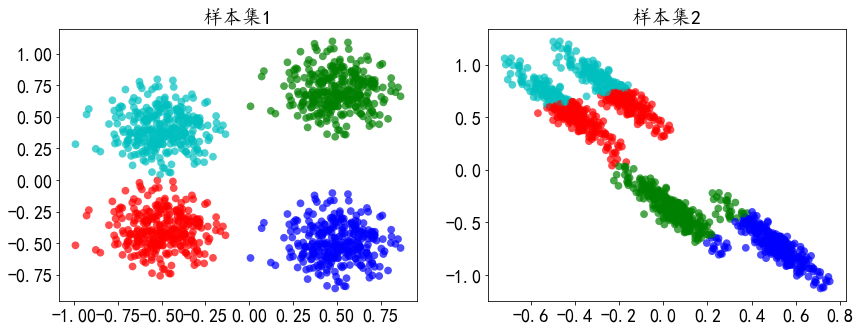

In [9]:
# 示例5 K-Means++算法对两个样本集进行聚类
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans
import matplotlib as mpl


# 产生样本
def generate_blobs_data(n_samples, idx):
    centers = [[-0.5, -0.4], [-0.5, 0.4], [0.5, -0.5], [0.5, 0.7]]
    stds = [0.15, 0.15, 0.15, 0.15]
    return make_blobs(n_features=2, n_samples=n_samples, random_state=5,
                      cluster_std=stds[idx], centers=[centers[idx]])[0]


# 可视化结果
def visualization(x, labels, idx):
    colors = ['g', 'r', 'b', 'c', 'k', 'm', 'y']
    for i in range(len(labels)):
        plt.scatter(x[i][0], x[i][1], marker='o', edgecolors='none',
                    s=60, color=colors[labels[i]], alpha=0.7)
    plt.xticks(fontproperties='Times New Roman', size=18)
    plt.yticks(fontproperties='Times New Roman', size=18)
    plt.title(f'样本集{idx}', size=20)


def main():
    # 产生样本集1
    X1 = np.vstack([generate_blobs_data(300, i) for i in range(4)])
    # 通过变换产生样本集2
    transformation = [[0.4, -0.2], [-0.6, 1.2]]
    X2 = np.dot(X1, transformation)
    X = (X1, X2)

    plt.figure(figsize=(14.1, 5), facecolor='w')
    mpl.rcParams['font.sans-serif'] = ['KaiTi']
    mpl.rcParams['axes.unicode_minus'] = False

    for i in range(2):
        # 执行K-Means++
        y = KMeans(n_clusters=4, init='k-means++').fit_predict(X[i])
        plt.subplot(1, 2, i + 1)
        visualization(X[i], y, i + 1)        
    plt.show()


if __name__ == '__main__':
    main()

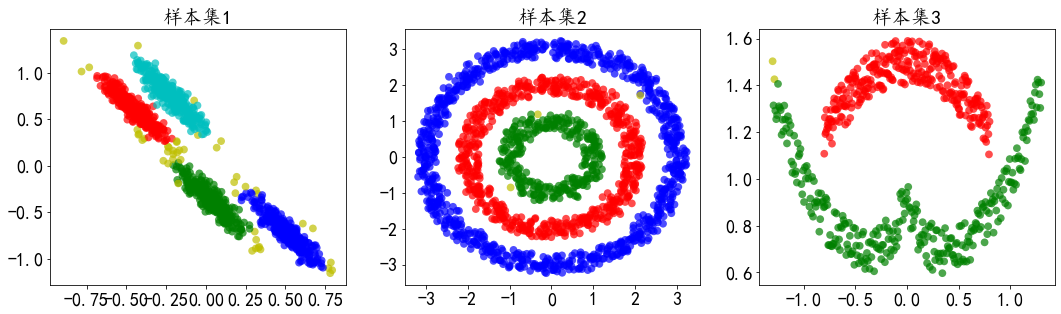

In [10]:
# 示例6 DBSCAN算法实现
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib as mpl


# 样本1
def generate_data_1(n_samples):
    centers = [[-0.5, -0.4], [-0.5, 0.4], [0.5, -0.5], [0.5, 0.7]]
    stds = [0.15, 0.15, 0.15, 0.15]
    X = np.vstack([make_blobs(n_features=2, n_samples=n_samples, 
                           cluster_std=stds[i], centers=[centers[i]], 
                           random_state=i)[0] for i in range(4)])
    transformation = [[0.4, -0.2], [-0.6, 1.2]]
    return np.dot(X, transformation)


# 样本2
def generate_data_2(n_samples):
    d = np.empty((0, 2))
    for i in range(1, 4):
        t = np.arange(0, 2 * np.pi, 2 * np.pi / (n_samples * i))
        cos = i * np.cos(t) + 0.25 - 0.5 * np.random.rand(len(t))
        sin = i * np.sin(t) + 0.25 - 0.5 * np.random.rand(len(t))
        d = np.vstack((d, np.vstack((cos, sin)).T))
    return d


# 样本3
def generate_data_3(n_samples):
    x1 = np.linspace(-1.3, 1.3, n_samples)
    x2 = np.ones_like(x1)
    for i in range(len(x1)):
        x2[i] = np.power(abs(x1[i]), abs(x1[i])) + 0.1 - 0.2 * np.random.rand()
    d1 = np.vstack((x1, x2)).T
    x3 = np.linspace(-0.8, 0.8, n_samples)
    x4 = np.cos(x3) + 0.4 + 0.2 * np.random.rand(len(x3))
    d2 = np.vstack((x3, x4)).T
    return np.vstack((d1, d2))


# 可视化结果
def visualization(x, labels, idx):
    colors = ['g', 'r', 'b', 'c', 'k', 'm', 'y']
    for i in range(len(labels)):
        plt.scatter(x[i][0], x[i][1], marker='o', edgecolors='none',
                    s=60, color=colors[labels[i]], alpha=0.7)
    plt.xticks(fontproperties='Times New Roman', size=18)
    plt.yticks(fontproperties='Times New Roman', size=18)
    plt.title(f'样本集{idx}', size=20)


def main():
    np.random.seed(5)
    X = (generate_data_1(300), generate_data_2(300), generate_data_3(300))
    # DBSCAN的参数
    para = [[0.055, 7], [0.2, 5], [0.1, 8]]

    plt.figure(figsize=(18, 4.7), facecolor='w')
    mpl.rcParams['font.sans-serif'] = ['KaiTi']
    mpl.rcParams['axes.unicode_minus'] = False
    for i in range(3):
        # 执行DBSCAN
        y = DBSCAN(eps=para[i][0], min_samples=para[i][1]).fit_predict(X[i])
        plt.subplot(1, 3, i + 1)
        visualization(X[i], y, i + 1)
    plt.show()


if __name__ == '__main__':
    main()

Start clustering ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


Start evaluating ...
************* K-Means++ **************
Jaccard score is 0.25.
Adjusted rand score is 0.02.
Silhouette score is -0.18.
************* Mean-shift *************
Jaccard score is 0.26.
Adjusted rand score is 0.01.
Silhouette score is 0.03.
*************** DBSCAN ***************
Jaccard score is 1.00.
Adjusted rand score is 1.00.
Silhouette score is 1.00.
*************** OPTICS ***************
Jaccard score is 0.70.
Adjusted rand score is 1.00.
Silhouette score is 1.00.
*************** Birch ****************
Jaccard score is 0.32.
Adjusted rand score is 0.07.
Silhouette score is -0.08.
********* Mini Batch K-Means *********
Jaccard score is 0.25.
Adjusted rand score is 0.00.
Silhouette score is -0.09.
******** Spectral Clustering *********
Jaccard score is 1.00.
Adjusted rand score is 1.00.
Silhouette score is 1.00.
******** Affinity Propagation ********
Jaccard score is 0.06.
Adjusted rand score is 0.09.
Silhouette score is -0.25.
****** Agglomerative Clustering ******


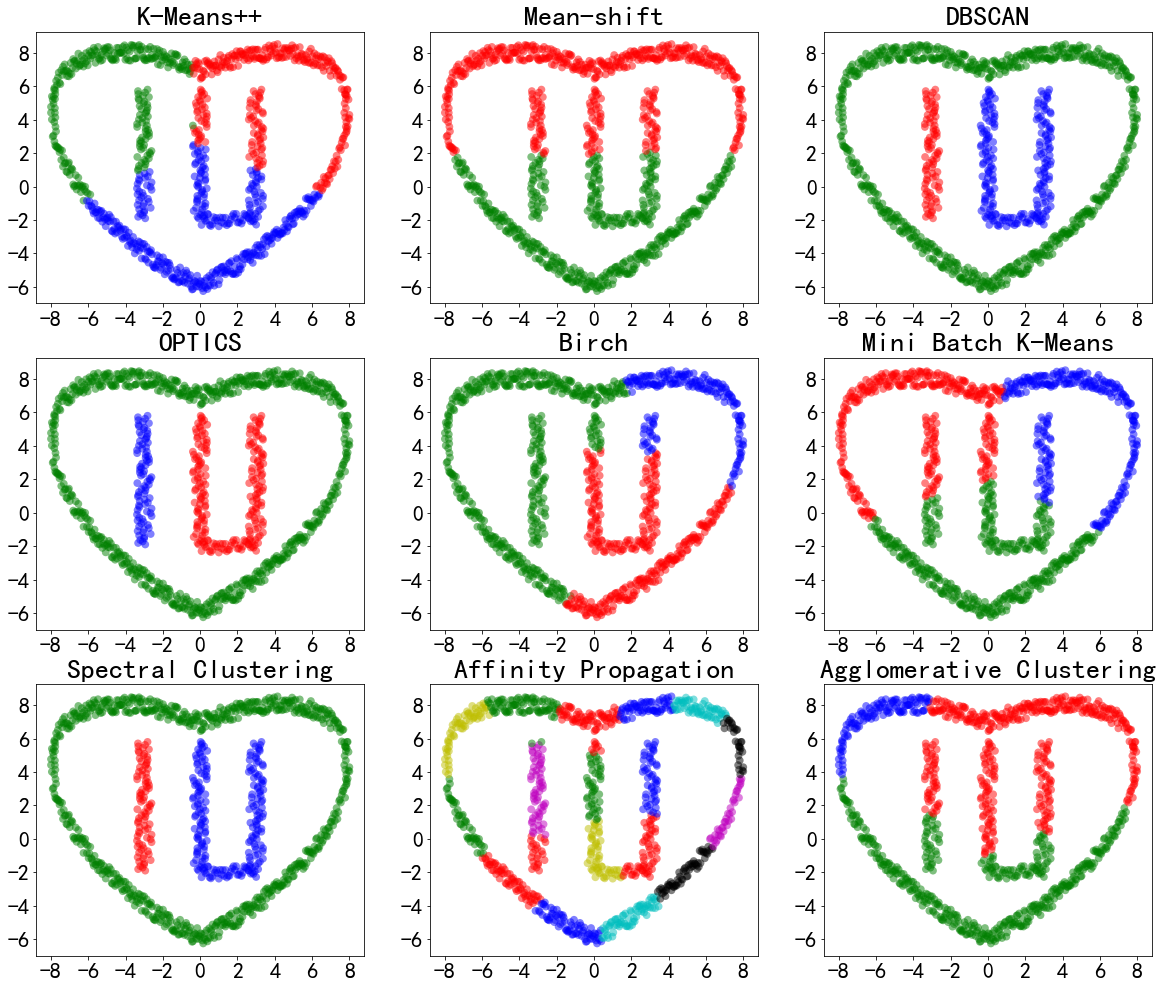

In [12]:
#示例7 各种聚类算法大战“爱心”数据集
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import OPTICS, Birch
from sklearn.cluster import MiniBatchKMeans as MBK
from sklearn.cluster import SpectralClustering as SC
from sklearn.cluster import AffinityPropagation as AP
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.metrics import euclidean_distances
from sklearn import metrics


# 可视化结果
def visualization(x, labels, idx, titles):
    colors = ['g', 'r', 'b', 'c', 'k', 'm', 'y']
    for i in range(len(labels)):
        plt.scatter(x[i][0], x[i][1], marker='o', edgecolors='none',
                    s=60, color=colors[labels[i] % len(colors)], alpha=0.5)
    plt.xticks(fontproperties='Times New Roman', size=22)
    plt.yticks(fontproperties='Times New Roman', size=22)
    plt.title(titles[idx], size=28)


# 聚类算法大作战
def clustering(X):
    print('Start clustering ...')
    dis = euclidean_distances(X, squared=True)
    # K-Means++
    y1 = KMeans(n_clusters=3, init='k-means++').fit_predict(X)
    # MeanShift
    bw = np.median(dis)
    band_width = 0.1 * bw
    y2 = MeanShift(bin_seeding=True, bandwidth=band_width).fit_predict(X)
    # DBSCAN
    y3 = DBSCAN(eps=0.6, min_samples=5).fit_predict(X)
    # OPTICS
    y4 = OPTICS(min_samples=5, eps=0.6, cluster_method='dbscan',
                metric='euclidean').fit_predict(X)
    # Birch
    y5 = Birch(branching_factor=60, threshold=0.6).fit_predict(X)
    # Mini Batch KMeans
    y6 = MBK(n_clusters=3, batch_size=50).fit_predict(X)
    # Spectral Clustering
    y7 = SC(affinity='rbf', n_clusters=3, gamma=6).fit_predict(X)
    # Affinity Propagation
    preference = -np.median(dis)
    p = 3 * preference
    y8 = AP(affinity='euclidean', preference=p, damping=0.75).fit_predict(X)
    # Agglomerative Clustering
    y9 = AC(n_clusters=3).fit_predict(X)
    return (y1, y2, y3, y4, y5, y6, y7, y8, y9)


# 评估结果
def evaluating(X, y, y_predict, methods):
    print('Start evaluating ...')
    for i, y_p in enumerate(y_predict):
        stars = (36 - len(methods[i])) // 2
        print('*' * stars, methods[i], '*' * (36 - stars - len(methods[i])))
        jaccard = metrics.jaccard_score(y, y_p, average='weighted')
        ari = metrics.adjusted_rand_score(y.flatten(), y_p)
        s = metrics.silhouette_score(y, y_p)
        print(f'Jaccard score is {jaccard:.2f}.')
        print(f'Adjusted rand score is {ari:.2f}.')
        print(f'Silhouette score is {s:.2f}.')
        plt.subplot(3, 3, i + 1)
        visualization(X, y_p, i, methods)


def main():
    np.random.seed(1)
    # 载入爱心数据
    X = np.load('love_data.npy')
    y = np.load('love_labels.npy')

    # 调用聚类算法
    methods = ['K-Means++', 'Mean-shift', 'DBSCAN', 'OPTICS',
              'Birch', 'Mini Batch K-Means', 'Spectral Clustering',
              'Affinity Propagation', 'Agglomerative Clustering']
    y_predict = clustering(X)
    plt.figure(figsize=(20, 17), facecolor='w')
    evaluating(X, y, y_predict, methods)
    plt.show()


if __name__ == '__main__':
    main()